In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import cv2
from pathlib import Path
path1 = Path('/content/drive/MyDrive/Rice_Image_Dataset/')
classnames = []
for path in Path(path1).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)

['Jasmine', 'Karacadag', 'Ipsala', 'Arborio', 'Basmati']


In [4]:
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path('/content/drive/MyDrive/Rice_Image_Dataset/'+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

Jasmine
Karacadag
Ipsala
Arborio
Basmati


In [5]:
from keras.utils import to_categorical
y = to_categorical(y)
print(np.array(X).shape)

(901, 64, 64, 3)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add((Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3), padding='same')))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(5, activation= 'softmax'))

from keras.optimizers import Adam
import keras
model.compile(optimizer= Adam(), loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size= 128 , epochs= 20 , verbose= 2)

Epoch 1/20
6/6 - 3s - loss: 0.7797 - accuracy: 0.7222 - 3s/epoch - 548ms/step
Epoch 2/20
6/6 - 3s - loss: 0.0494 - accuracy: 0.9917 - 3s/epoch - 451ms/step
Epoch 3/20
6/6 - 3s - loss: 0.0120 - accuracy: 0.9958 - 3s/epoch - 449ms/step
Epoch 4/20
6/6 - 3s - loss: 0.0034 - accuracy: 0.9986 - 3s/epoch - 441ms/step
Epoch 5/20
6/6 - 3s - loss: 0.0057 - accuracy: 0.9986 - 3s/epoch - 459ms/step
Epoch 6/20
6/6 - 3s - loss: 0.0078 - accuracy: 0.9986 - 3s/epoch - 449ms/step
Epoch 7/20
6/6 - 3s - loss: 0.0097 - accuracy: 0.9986 - 3s/epoch - 509ms/step
Epoch 8/20
6/6 - 4s - loss: 0.0200 - accuracy: 0.9931 - 4s/epoch - 666ms/step
Epoch 9/20
6/6 - 3s - loss: 0.0063 - accuracy: 0.9972 - 3s/epoch - 532ms/step
Epoch 10/20
6/6 - 3s - loss: 0.0048 - accuracy: 0.9972 - 3s/epoch - 450ms/step
Epoch 11/20
6/6 - 3s - loss: 0.0056 - accuracy: 0.9972 - 3s/epoch - 451ms/step
Epoch 12/20
6/6 - 3s - loss: 0.0013 - accuracy: 1.0000 - 3s/epoch - 431ms/step
Epoch 13/20
6/6 - 3s - loss: 1.1420e-04 - accuracy: 1.0000 - 

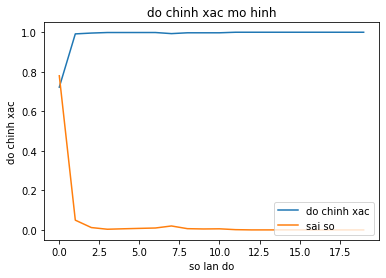

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('do chinh xac mo hinh')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

In [12]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 34ms/step - loss: 0.0520 - accuracy: 0.9834


(64, 64, 3)
1/1 [==============================] - 0s 15ms/step
Basmati
Basmati


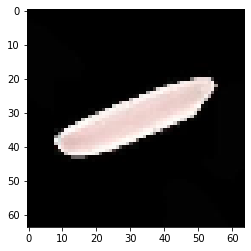

In [15]:
n = 55
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 64, 64, 3)))
print(classnames[pred.argmax()])
print(classnames[y_test[n].argmax()])